# Part 2: Data Inspection, Cleaning and Wrangling in Python
## Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data  


Author: Mark Bauer

Table of Contents
=================

   Getting Started
          
   1. Importing Libraries 
   2. Reading in Data as a pandas Dataframe      
   3. Data Inspection
       * 3.1 Previewing Data
       * 3.2 Calculating Summary Statistics
       * 3.3 Identifying Null Values 
   4. Data Cleaning & Wrangling
       * 4.1 Previewing Column Values
       * 4.2 Exploring Distribution of Values
       * 4.3 Filtering Data
       * 4.4 Create New Columns
       * 4.5 Filling In or Dropping Null Values 
   5. Sample Analysis
       * 5.1. Line Plot of Year Built
       * 5.2. Identify Oldest Building in Dataset  
   6. Conclusion

**Goal:** In this notebook, we will review various ways to to inspect, clean, wrangle, and detect outliers in your data.

**Main Library:** [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

# Getting Started: Accessing the Building Footprints Dataset

![building_footprints_csv](images/building-footprints-csv.png)

Screenshot of link address.

**Dataset Link**: https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

**Documentation**: https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# to plot matplotlib figures inline on the notebook
%matplotlib inline

Printing verions of Python modules and packages with **watermark** documention for installing watermark: https://github.com/rasbt/watermark. Performed for reproducibility.

In [2]:
%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.6.0

numpy     : 1.23.4
pandas    : 1.5.1
matplotlib: 3.6.2
seaborn   : 0.12.1



# 2. Reading in Data as a pandas Dataframe

In [3]:
# reading in data as a pandas dataframe
path = 'https://data.cityofnewyork.us/api/views/qb5r-6dgf/rows.csv?accessType=DOWNLOAD'
building_df = pd.read_csv(path)

# preview data
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


# 3. Data Inspection
## 3.1 Previewing Data

In [4]:
# return the first five rows
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


In [5]:
# return the last five rows
building_df.tail()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
1082959,MULTIPOLYGON (((-73.99956501703511 40.72039743...,NaN,1091063,1900.0,11/01/2024 12:00:00 AM,Alteration,1302671,94.660000,2100,24.0,0,0,1004730051,1004730051,Other (Man,{151309FC-B779-46CE-B1D9-1584AEA02FC6}
1082960,MULTIPOLYGON (((-74.0000149828318 40.688200830...,NaN,3394115,2009.0,08/22/2017 12:00:00 AM,Constructed,1114346,81.127098,2100,17.0,0,0,3003040018,3003047502,Photogramm,{A200FA56-7C7C-42F7-AA99-2C9DD5BF9EF6}
1082961,MULTIPOLYGON (((-73.99984919403173 40.68862382...,NaN,3397444,NaN,01/22/2019 12:00:00 AM,Constructed,1114440,73.179002,2100,16.0,0,0,3003040018,3003047502,Photogramm,{9B137E5C-68B4-408A-B449-E5BF57F3B6E3}
1082962,MULTIPOLYGON (((-73.8343042812369 40.757419581...,NaN,4539469,NaN,01/22/2019 12:00:00 AM,Constructed,1107493,194.084179,2100,9.0,0,0,4050660001,4050667503,Photogramm,{B056D55A-FD91-4671-A57C-8523F26C8C61}
1082963,MULTIPOLYGON (((-73.83440749536311 40.75742362...,NaN,4540380,2006.0,04/11/2019 12:00:00 AM,Constructed,1114668,185.779728,2100,22.0,0,0,4050660001,4050667503,Photogramm,{E549C8DC-0457-43CB-88F6-136472CE6946}


In [6]:
# inspect the shape or dimensions of our dataframe (i.e. rows, columns)
building_df.shape

(1082964, 16)

In [7]:
# more readable
rows, columns = building_df.shape
print(f'This dataset has {rows:,} rows and {columns:,} columns.')

This dataset has 1,082,964 rows and 16 columns.


In [8]:
# the object's type
type(building_df)

pandas.core.frame.DataFrame

In [9]:
# the object's type of a column
type(building_df['CNSTRCT_YR'])

pandas.core.series.Series

In [10]:
# notice the difference of type from series to dataframe
print(type(building_df["CNSTRCT_YR"]))
print(type(building_df[["CNSTRCT_YR"]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [11]:
# inspect columns
building_df.columns

Index(['the_geom', 'NAME', 'BIN', 'CNSTRCT_YR', 'LSTMODDATE', 'LSTSTATYPE',
       'DOITT_ID', 'HEIGHTROOF', 'FEAT_CODE', 'GROUNDELEV', 'SHAPE_AREA',
       'SHAPE_LEN', 'BASE_BBL', 'MPLUTO_BBL', 'GEOMSOURCE', 'GLOBALID'],
      dtype='object')

In [12]:
# inspect the datatypes of columns
building_df.dtypes

the_geom       object
NAME           object
BIN             int64
CNSTRCT_YR    float64
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE       int64
GROUNDELEV    float64
SHAPE_AREA      int64
SHAPE_LEN       int64
BASE_BBL        int64
MPLUTO_BBL      int64
GEOMSOURCE     object
GLOBALID       object
dtype: object

In [13]:
# return the names, non-null counts and datatypes of columns
building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082964 entries, 0 to 1082963
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   the_geom    1082964 non-null  object 
 1   NAME        2247 non-null     object 
 2   BIN         1082964 non-null  int64  
 3   CNSTRCT_YR  1072721 non-null  float64
 4   LSTMODDATE  1082964 non-null  object 
 5   LSTSTATYPE  1082633 non-null  object 
 6   DOITT_ID    1082964 non-null  int64  
 7   HEIGHTROOF  1080385 non-null  float64
 8   FEAT_CODE   1082964 non-null  int64  
 9   GROUNDELEV  1082413 non-null  float64
 10  SHAPE_AREA  1082964 non-null  int64  
 11  SHAPE_LEN   1082964 non-null  int64  
 12  BASE_BBL    1082964 non-null  int64  
 13  MPLUTO_BBL  1082964 non-null  int64  
 14  GEOMSOURCE  1082662 non-null  object 
 15  GLOBALID    1082964 non-null  object 
dtypes: float64(3), int64(7), object(6)
memory usage: 132.2+ MB


In [14]:
# inspect RangeIndex
building_df.index

RangeIndex(start=0, stop=1082964, step=1)

In [15]:
# inspect True/False if column is unique on our unique key (DOITT_ID)
building_df['DOITT_ID'].is_unique

True

## 3.2 Calculating Summary Statistics

In [16]:
# descriptive statistics of numeric columns
building_df.describe()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1.082964e+06,1.072721e+06,1.082964e+06,1.080385e+06,1.082964e+06,1.082413e+06,1082964.0,1082964.0,1.082964e+06,1.082964e+06
mean,3.713174e+06,1.939675e+03,5.951884e+05,2.771381e+01,2.693296e+03,5.512603e+01,0.0,0.0,3.564311e+09,3.564311e+09
std,1.026611e+06,2.952066e+01,3.624453e+05,2.183592e+01,1.198342e+03,4.155005e+01,0.0,0.0,9.857978e+08,9.857978e+08
min,1.000000e+06,1.652000e+03,1.000000e+00,0.000000e+00,1.000000e+03,-1.600000e+01,0.0,0.0,1.000010e+09,1.000010e+09
25%,3.129808e+06,1.920000e+03,2.882088e+05,1.854000e+01,2.100000e+03,2.500000e+01,0.0,0.0,3.043430e+09,3.043430e+09
50%,4.067980e+06,1.930000e+03,5.766045e+05,2.613000e+01,2.100000e+03,4.600000e+01,0.0,0.0,4.019580e+09,4.019580e+09
75%,4.483554e+06,1.955000e+03,8.668562e+05,3.114000e+01,2.100000e+03,7.400000e+01,0.0,0.0,4.107013e+09,4.107013e+09
max,5.799523e+06,2.025000e+03,1.302671e+06,1.550000e+03,5.110000e+03,1.335000e+03,0.0,0.0,6.000000e+09,6.000000e+09


In [17]:
# descriptive statistics of string columns
building_df.describe(include=['O'])

,the_geom,NAME,LSTMODDATE,LSTSTATYPE,GEOMSOURCE,GLOBALID
count,1082964,2247,1082964,1082633,1082662,1082964
unique,1082964,1888,1901,12,3,1082964
top,MULTIPOLYGON (((-73.96664570466969 40.62599676...,Adler Place Town Houses,08/22/2017 12:00:00 AM,Constructed,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
freq,1,52,799638,1080270,1011168,1


In [18]:
# returning the mode of CNSTRCT_YR and NAME
(building_df
 .loc[:, ['CNSTRCT_YR', 'NAME']]
 .mode()
 .T
 .rename(columns={0: "mode"})
)

,mode
CNSTRCT_YR,1920.0
NAME,Adler Place Town Houses


In [19]:
# value counts of the CNSTRCT_YR column - top 10
(building_df['CNSTRCT_YR']
 .value_counts()
 .head(10)
)

1920.0    129966
1930.0    112408
1925.0    108937
1950.0     62598
1910.0     52163
1940.0     51179
1960.0     40721
1935.0     38502
1931.0     36618
1945.0     34011
Name: CNSTRCT_YR, dtype: int64

In [20]:
# value counts of the NAME column - top 10
(building_df['NAME']
 .value_counts()
 .head(10)
)

Adler Place Town Houses     52
Cooper Place Town Houses    38
Broun Place Town Houses     36
Debs Place Town Houses      34
Defoe Place Town Houses     26
Asch Loop Town Houses       18
Earhart Lane Town Houses    16
NO NAME                      9
Restrooms                    8
Kimball Block                6
Name: NAME, dtype: int64

I provide several examples of pandas `groupby` method below, as it's very common in data analysis.

In [21]:
# group by 'LSTSTATYPE', count of rows
(building_df
 .groupby(by='LSTSTATYPE')['DOITT_ID']
 .count()
)

LSTSTATYPE
Alteration                     1518
Constructed                 1080270
Correction                       69
Demolition                       13
Geometry                         17
Initialization                  111
Investigate Construction         50
Investigate Demolition            5
Marked for Construction          23
Marked for Demolition           126
Merged                           93
Split                           338
Name: DOITT_ID, dtype: int64

In [22]:
# group by 'FEAT_CODE', mean value of 'HEIGHTROOF' and mean value of 'GROUNDELEV'
(building_df
 .groupby(by='FEAT_CODE')[['HEIGHTROOF', 'GROUNDELEV']]
 .mean()
 .rename(columns={
     'HEIGHTROOF':'HEIGHTROOF_avg',
     'GROUNDELEV':'GROUNDELEV_avg'
 })
)

,HEIGHTROOF_avg,GROUNDELEV_avg
FEAT_CODE,,
1000,14.853740,39.965517
1001,18.060071,55.975000
1003,166.333333,50.629630
1004,17.081468,31.788288
1005,25.180486,29.217391
1006,367.722222,38.333333
2100,31.635171,55.105681
2110,54.010564,37.617391
5100,96.022102,52.051546


In [23]:
# group by 'LSTSTATYPE' and 'FEAT_CODE', count of rows
(building_df
 .groupby(by=['LSTSTATYPE', 'FEAT_CODE'])[['DOITT_ID']]
 .count()
 .rename(columns={'DOITT_ID':'count'})
)

count
LSTSTATYPE               FEAT_CODE        
Alteration               1004            3
                         2100         1448
                         5100            2
                         5110           65
Constructed              1000           85
                         1001          123
                         1003            7
                         1004          221
                         1005           24
                         1006           17
                         2100       866256
                         2110          123
                         5100          125
                         5110       213289
Correction               2100           50
                         5100            1
                         5110           18
Demolition               2100           10
                         5110            3
Geometry                 1000           10
                         2100            7
Initialization           1003            6
                         1004            1
                         1006            1
                         2100           47
                         5100           52
                         5110            4
Investigate Construction 2100           34
                         5100           13
                         5110            3
Investigate Demolition   2100            5
Marked for Construction  1003           14
                         2100            6
                         5100            3
Marked for Demolition    1003            2
                         2100          107
                         5110           17
Merged                   2100           92
                         5110            1
Split                    1000            1
                         1004            2
                         2100          330
                         5110            5

In [24]:
# group by 'LSTSTATYPE' and 'FEAT_CODE', count of rows and explode the indexes
(building_df
 .groupby(by=['LSTSTATYPE', 'FEAT_CODE'])[['DOITT_ID']]
 .count()
 .rename(columns={'DOITT_ID':'count'})
 .reset_index()
)

,LSTSTATYPE,FEAT_CODE,count
0,Alteration,1004,3
1,Alteration,2100,1448
2,Alteration,5100,2
3,Alteration,5110,65
4,Constructed,1000,85
5,Constructed,1001,123
6,Constructed,1003,7
7,Constructed,1004,221
8,Constructed,1005,24
9,Constructed,1006,17


In [25]:
# compute pairwise correlation of columns, excluding null values
building_df.corr(numeric_only=True)

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
BIN,1.000000,0.290292,0.156156,-0.356978,0.190979,0.087077,NaN,NaN,0.988673,0.988673
CNSTRCT_YR,0.290292,1.000000,0.205949,0.027337,-0.132291,-0.003038,NaN,NaN,0.283942,0.283942
DOITT_ID,0.156156,0.205949,1.000000,-0.158092,0.539096,-0.017085,NaN,NaN,0.075716,0.075716
HEIGHTROOF,-0.356978,0.027337,-0.158092,1.000000,-0.362291,-0.002693,NaN,NaN,-0.327759,-0.327759
FEAT_CODE,0.190979,-0.132291,0.539096,-0.362291,1.000000,0.001664,NaN,NaN,0.090450,0.090450
GROUNDELEV,0.087077,-0.003038,-0.017085,-0.002693,0.001664,1.000000,NaN,NaN,0.106218,0.106218
SHAPE_AREA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHAPE_LEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BASE_BBL,0.988673,0.283942,0.075716,-0.327759,0.090450,0.106218,NaN,NaN,1.000000,1.000000
MPLUTO_BBL,0.988673,0.283942,0.075716,-0.327759,0.090450,0.106218,NaN,NaN,1.000000,1.000000


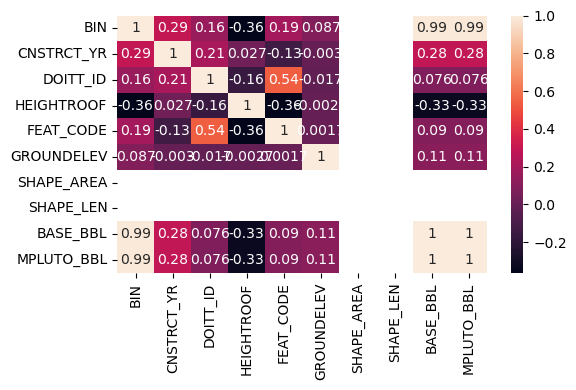

In [26]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(6, 4))

sns.heatmap(
    building_df.corr(numeric_only=True), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

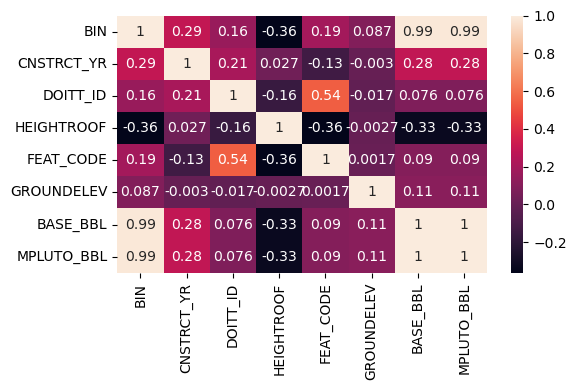

In [27]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(6, 4))

# dropping columns of all nulls
corr_df = building_df.drop(columns=['SHAPE_AREA', 'SHAPE_LEN'])

sns.heatmap(
    corr_df.corr(numeric_only=True), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

## 3.3 Identifying Null Values

In [28]:
# total nulls in dataframe
null_count = (
    building_df
    .isnull()
    .sum()
    .sum()
)

print(f'total nulls in dataframe: {null_count:,}')

total nulls in dataframe: 1,094,723


In [29]:
# total non-nulls in dataframe
nonnull_count = (
    building_df
    .notnull()
    .sum()
    .sum()
)

print(f'total non-nulls in dataframe: {nonnull_count:,}')

total non-nulls in dataframe: 16,232,701


In [30]:
# nulls per column sorted descending
(building_df
 .isnull()
 .sum()
 .sort_values(ascending=False)
)

NAME          1080717
CNSTRCT_YR      10243
HEIGHTROOF       2579
GROUNDELEV        551
LSTSTATYPE        331
GEOMSOURCE        302
the_geom            0
BIN                 0
LSTMODDATE          0
DOITT_ID            0
FEAT_CODE           0
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            0
MPLUTO_BBL          0
GLOBALID            0
dtype: int64

In [31]:
# calculating a percentage of the number of nulls to total number of records of each column
(building_df
 .isnull()
 .sum()
 .sort_values(ascending=False)
 .div(building_df.shape[0])
 .mul(100)
)

NAME          99.792514
CNSTRCT_YR     0.945830
HEIGHTROOF     0.238143
GROUNDELEV     0.050879
LSTSTATYPE     0.030564
GEOMSOURCE     0.027886
the_geom       0.000000
BIN            0.000000
LSTMODDATE     0.000000
DOITT_ID       0.000000
FEAT_CODE      0.000000
SHAPE_AREA     0.000000
SHAPE_LEN      0.000000
BASE_BBL       0.000000
MPLUTO_BBL     0.000000
GLOBALID       0.000000
dtype: float64

In [32]:
# % null as a dataframe
missing_data = (building_df.isnull().sum() / building_df.shape[0]) * 100

# creating a dataframe
missing_df = pd.DataFrame(
    missing_data,
    columns=['perc_missing']
)

missing_df.sort_values(by='perc_missing', ascending=False)

,perc_missing
NAME,99.792514
CNSTRCT_YR,0.945830
HEIGHTROOF,0.238143
GROUNDELEV,0.050879
LSTSTATYPE,0.030564
GEOMSOURCE,0.027886
the_geom,0.000000
BIN,0.000000
LSTMODDATE,0.000000
DOITT_ID,0.000000


In [33]:
# return a boolean same-sized object of nulls
building_df.isnull()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082959,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1082960,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1082961,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1082962,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
# return a boolean if any of the values are null in column
(building_df
 .isnull()
 .any()
)

the_geom      False
NAME           True
BIN           False
CNSTRCT_YR     True
LSTMODDATE    False
LSTSTATYPE     True
DOITT_ID      False
HEIGHTROOF     True
FEAT_CODE     False
GROUNDELEV     True
SHAPE_AREA    False
SHAPE_LEN     False
BASE_BBL      False
MPLUTO_BBL    False
GEOMSOURCE     True
GLOBALID      False
dtype: bool

In [35]:
# return a boolean same-sized object of nulls in NAME column
building_df['NAME'].notnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1082959    False
1082960    False
1082961    False
1082962    False
1082963    False
Name: NAME, Length: 1082964, dtype: bool

In [36]:
# returning rows with non-null values in NAME column
building_df.loc[building_df['NAME'].notnull()]

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
3575,MULTIPOLYGON (((-73.95317216502298 40.75924424...,Roosevelt Isld Subway Station,1089270,1975.0,03/25/2008 12:00:00 AM,Constructed,996736,28.470000,2100,16.0,0,0,1013730001,1013730001,Photogramm,{E49130B9-6088-4BB5-9BA5-ABA8BFC69BA7}
4307,MULTIPOLYGON (((-73.88526375915657 40.86258229...,Alpha House,2102033,1922.0,08/17/2017 12:00:00 AM,Constructed,194515,22.560000,5110,98.0,0,0,2032730001,2032730001,Photogramm,{8A21945E-76A9-47A7-9355-2D500A91A949}
5785,MULTIPOLYGON (((-73.88149603905721 40.84855265...,Pheasant Aviary,2123889,1905.0,07/17/2014 12:00:00 AM,Constructed,925752,22.075648,2100,70.0,0,0,2031200020,2031200020,Photogramm,{2BCDE23D-4DD7-4642-8FC1-B347EDE772CA}
7974,MULTIPOLYGON (((-73.8312596282937 40.871147879...,Asch Loop Town Houses,2128807,1969.0,08/22/2017 12:00:00 AM,Constructed,197782,26.450000,2100,18.0,0,0,2051410120,2051410120,Photogramm,{E7006798-10CF-49AA-BE4E-A1039405D38A}
8129,MULTIPOLYGON (((-73.90110014758918 40.73308422...,NO NAME,4597316,1940.0,08/17/2017 12:00:00 AM,Constructed,786648,11.000000,5110,68.0,0,0,4023750180,4023750180,Other (Man,{E2CADF8E-D955-4BD4-AEED-0EFC3A2149C4}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080866,MULTIPOLYGON (((-74.01066784278217 40.71190680...,Tower 2 World Trade Ctr,1089308,2023.0,05/06/2024 12:00:00 AM,Constructed,1256146,41.883905,2100,20.0,0,0,1000580001,1000580001,Other (Man,{25251D04-C615-4866-B45B-2885FACDDF0D}
1081166,MULTIPOLYGON (((-73.79566736659639 40.65514293...,83,4542282,1994.0,02/22/2024 12:00:00 AM,Alteration,1260149,41.000000,2100,9.0,0,0,4142600001,4142600001,Other (Man,{DC541EA1-0B7F-4E54-94A3-E8A2F61F8DFF}
1081239,MULTIPOLYGON (((-73.95209408465293 40.78829631...,Building B,1091029,1992.0,08/25/2023 12:00:00 AM,Split,1300335,328.810000,1000,53.0,0,0,1016040023,1016040023,Other (Man,{E1111641-540E-4E76-86BC-81A88443EC5B}
1081372,MULTIPOLYGON (((-73.96861892021917 40.75798235...,Lipstick Building,1038549,1986.0,08/22/2017 12:00:00 AM,Constructed,99468,464.420000,2100,36.0,0,0,1013270001,1013277504,Photogramm,{C07FE8C7-FD69-4312-821B-5C792E05E17F}


In [37]:
# returning rows with null values in NAME column
building_df.loc[building_df['NAME'].isnull()]

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082959,MULTIPOLYGON (((-73.99956501703511 40.72039743...,NaN,1091063,1900.0,11/01/2024 12:00:00 AM,Alteration,1302671,94.660000,2100,24.0,0,0,1004730051,1004730051,Other (Man,{151309FC-B779-46CE-B1D9-1584AEA02FC6}
1082960,MULTIPOLYGON (((-74.0000149828318 40.688200830...,NaN,3394115,2009.0,08/22/2017 12:00:00 AM,Constructed,1114346,81.127098,2100,17.0,0,0,3003040018,3003047502,Photogramm,{A200FA56-7C7C-42F7-AA99-2C9DD5BF9EF6}
1082961,MULTIPOLYGON (((-73.99984919403173 40.68862382...,NaN,3397444,NaN,01/22/2019 12:00:00 AM,Constructed,1114440,73.179002,2100,16.0,0,0,3003040018,3003047502,Photogramm,{9B137E5C-68B4-408A-B449-E5BF57F3B6E3}
1082962,MULTIPOLYGON (((-73.8343042812369 40.757419581...,NaN,4539469,NaN,01/22/2019 12:00:00 AM,Constructed,1107493,194.084179,2100,9.0,0,0,4050660001,4050667503,Photogramm,{B056D55A-FD91-4671-A57C-8523F26C8C61}


# 4. Data Cleaning & Wrangling

We will be cleaning the **Construction Year** (i.e. CNSTRCT_YR) column, as this is the column we will be using in our analysis.

## 4.1 Previewing Column Values

In [38]:
# returning a series of the 'CNSTRCT_YR' column
building_df["CNSTRCT_YR"]

0          1925.0
1          1965.0
2          1970.0
3          1928.0
4          1950.0
            ...  
1082959    1900.0
1082960    2009.0
1082961       NaN
1082962       NaN
1082963    2006.0
Name: CNSTRCT_YR, Length: 1082964, dtype: float64

In [39]:
# returning a dataframe of the 'CNSTRCT_YR' column double brackets with .loc method
building_df.loc[:, ["CNSTRCT_YR"]]

,CNSTRCT_YR
0,1925.0
1,1965.0
2,1970.0
3,1928.0
4,1950.0
...,...
1082959,1900.0
1082960,2009.0
1082961,NaN
1082962,NaN


In [40]:
# first five rows sorted by the 'CNSTRCT_YR' column in ascending order
building_df.sort_values('CNSTRCT_YR').head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
955187,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.540000,2100,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}
710089,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,4113403,1661.0,08/22/2017 12:00:00 AM,Constructed,776399,26.120000,2100,64.0,0,0,4050130006,4050130006,Photogramm,{71A760A6-6D2F-48F8-8C93-C8B66071B868}
430689,MULTIPOLYGON (((-73.82449114078894 40.76279389...,NaN,4610542,1661.0,08/17/2017 12:00:00 AM,Constructed,1190137,14.846959,5110,63.0,0,0,4050130006,4050130006,Photogramm,{36678A28-E8EE-45E8-BAA2-9A3F5118E176}
52813,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,5087656,1680.0,04/13/2020 12:00:00 AM,Constructed,702698,38.640000,2100,38.0,0,0,5078570090,5078570090,Photogramm,{CB13BCBA-9DF3-4455-9206-824FE91F2EDE}
521346,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,5042188,1690.0,04/13/2020 12:00:00 AM,Alteration,806241,22.260000,2100,21.0,0,0,5028300049,5028300049,Photogramm,{93B1CB7B-BE72-40DB-9B66-01E92DF4AE6E}


In [41]:
# first five rows sorted by the 'CNSTRCT_YR' column in descending order
building_df.sort_values('CNSTRCT_YR', ascending=False).head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
1081852,MULTIPOLYGON (((-74.230067606122 40.5237650566...,NaN,5164123,2025.0,10/18/2024 12:00:00 AM,Constructed,1302640,30.000000,2100,79.0,0,0,5075770089,5075770089,Other (Man,{5875684A-4004-4531-9CEC-026A01906C19}
1077594,MULTIPOLYGON (((-73.92623075729338 40.69897310...,NaN,3428954,2024.0,06/17/2024 12:00:00 AM,Constructed,1302149,53.000000,2100,50.0,0,0,3032180001,3032187501,Other (Man,{CBB2E0AD-B0BE-43C0-B397-F1A600553D8C}
1081810,MULTIPOLYGON (((-73.9590071614393 40.694111756...,NaN,3054935,2024.0,05/24/2024 12:00:00 AM,Constructed,1302101,58.567634,2100,52.0,0,0,3019120022,3019120022,Photogramm,{9F74FFFF-9240-491E-BBFB-9A14F9149672}
1081811,MULTIPOLYGON (((-73.97152904331807 40.60617410...,NaN,3177165,2024.0,05/24/2024 12:00:00 AM,Constructed,1302103,32.525289,2100,26.0,0,0,3066580016,3066580016,Photogramm,{87D80FFB-C8E0-499C-8A5B-914FF66F549E}
1081813,MULTIPOLYGON (((-74.10577480200087 40.56462199...,NaN,5170436,2024.0,04/18/2024 12:00:00 AM,Constructed,1301924,10.283611,5110,6.0,0,0,5040470051,5040470051,Photogramm,{4ED78AF8-F697-44ED-9481-59618FE9343F}


In [42]:
# first five rows sorted by the 'CNSTRCT_YR' column in descending order
(building_df
 .sort_values('CNSTRCT_YR', ascending=False)
 .loc[:, ['CNSTRCT_YR']]
 .head()
)

,CNSTRCT_YR
1081852,2025.0
1077594,2024.0
1081810,2024.0
1081811,2024.0
1081813,2024.0


In [43]:
# descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset's distribution, excluding ``NaN`` values.

building_df['CNSTRCT_YR'].describe().round(2)

count    1072721.00
mean        1939.67
std           29.52
min         1652.00
25%         1920.00
50%         1930.00
75%         1955.00
max         2025.00
Name: CNSTRCT_YR, dtype: float64

## 4.2 Exploring Distribution of Values

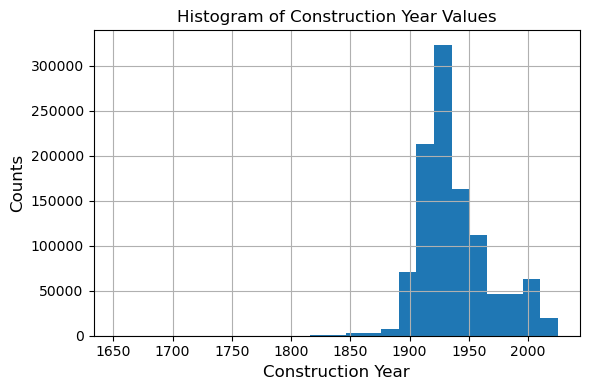

In [44]:
# making a histogram of our 'CNSTRCT_YR' column with 25 bins
fig, ax = plt.subplots(figsize=(6, 4))

building_df['CNSTRCT_YR'].hist(
    ax=ax,
    bins=25
)

# adding labels
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Counts', fontsize=12) 
plt.title('Histogram of Construction Year Values', fontsize=12) 

plt.tight_layout()

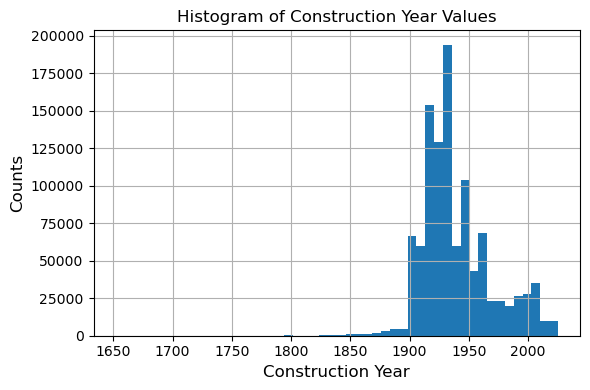

In [45]:
# making a histogram of our 'CNSTRCT_YR' column with 50 bins
fig, ax = plt.subplots(figsize=(6, 4))

building_df['CNSTRCT_YR'].hist(
    ax=ax,
    bins=50
)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Histogram of Construction Year Values', fontsize=12)

plt.tight_layout()

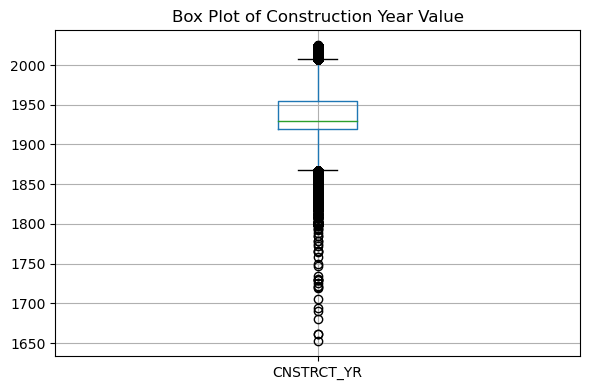

In [46]:
# making a box plot from our 'CNSTRCT_YR' column
fig, ax = plt.subplots(figsize=(6, 4))

building_df.boxplot(
    column=['CNSTRCT_YR'], 
    ax=ax
)

plt.title('Box Plot of Construction Year Value', fontsize=12)

plt.tight_layout()

## 4.3 Filtering Data

**df.iloc**: Purely integer-location based indexing for selection by position.

In [47]:
# first row, first column
building_df.iloc[0, 0]

'MULTIPOLYGON (((-73.96664570466969 40.62599676998366, -73.96684846176461 40.625977490862574, -73.96685938726297 40.62604419372411, -73.96661621040211 40.62606731716107, -73.96660638332114 40.626007324369795, -73.96664680403327 40.626003480977275, -73.96664570466969 40.62599676998366)))'

In [48]:
# first row, start at second column return all columns
building_df.iloc[0, 1:]

NAME                                             NaN
BIN                                          3170958
CNSTRCT_YR                                    1925.0
LSTMODDATE                    08/22/2017 12:00:00 AM
LSTSTATYPE                               Constructed
DOITT_ID                                       96807
HEIGHTROOF                                 29.749853
FEAT_CODE                                       2100
GROUNDELEV                                      40.0
SHAPE_AREA                                         0
SHAPE_LEN                                          0
BASE_BBL                                  3065220021
MPLUTO_BBL                                3065220021
GEOMSOURCE                                Photogramm
GLOBALID      {31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
Name: 0, dtype: object

In [49]:
# first row, start at second column up to the last
building_df.iloc[0, 1:-1]

NAME                             NaN
BIN                          3170958
CNSTRCT_YR                    1925.0
LSTMODDATE    08/22/2017 12:00:00 AM
LSTSTATYPE               Constructed
DOITT_ID                       96807
HEIGHTROOF                 29.749853
FEAT_CODE                       2100
GROUNDELEV                      40.0
SHAPE_AREA                         0
SHAPE_LEN                          0
BASE_BBL                  3065220021
MPLUTO_BBL                3065220021
GEOMSOURCE                Photogramm
Name: 0, dtype: object

In [50]:
# specify row and column positions
building_df.iloc[[0, 5, 10], [0, 2, 5, 8]]

,the_geom,BIN,LSTSTATYPE,FEAT_CODE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,3170958,Constructed,2100
5,MULTIPOLYGON (((-74.14644228489016 40.58885592...,5122427,Constructed,2100
10,MULTIPOLYGON (((-74.1344861688728 40.600563532...,5034441,Constructed,2100


**df.loc**: Access a group of rows and columns by label(s) or a boolean array.

In [51]:
# locate rows where construction year > 2000
(building_df
 .loc[building_df['CNSTRCT_YR'] > 2000]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
6,MULTIPOLYGON (((-74.221228292902 40.5303177260...,NaN,5133580,2001.0,08/22/2017 12:00:00 AM,Constructed,937499,27.310000,2100,105.0,0,0,5073560090,5073560090,Photogramm,{57FDA52A-A7A6-4571-8B09-609930CE6308}
50,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,3394646,2009.0,08/22/2017 12:00:00 AM,Constructed,1212853,21.608508,2100,18.0,0,0,3044520815,3044520815,Photogramm,{33E7F6CF-9E99-4317-A915-30ACA041102C}
80,MULTIPOLYGON (((-73.92554066446792 40.70095338...,NaN,3072927,2003.0,08/22/2017 12:00:00 AM,Constructed,986709,25.110000,2100,52.0,0,0,3032090105,3032090105,Photogramm,{12419B35-0CC1-4D78-B6C4-63B357ED71F5}
98,MULTIPOLYGON (((-73.94885443008951 40.69275708...,NaN,3390096,2004.0,08/22/2017 12:00:00 AM,Constructed,1049056,38.747306,2100,38.0,0,0,3017700054,3017700054,Photogramm,{A0589BC1-A408-4818-AADD-55772C4D2AAE}
224,MULTIPOLYGON (((-73.70962745809653 40.73251740...,NaN,4555084,2004.0,08/17/2017 12:00:00 AM,Constructed,1227251,12.010000,5110,93.0,0,0,4088150039,4088150039,Photogramm,{BA42A1C4-FD8B-4FF9-B768-2644D66E0D7B}


In [52]:
# locate construction year > 2000, columns 'BIN', 'CNSTRCT_YR'
(building_df
 .loc[building_df['CNSTRCT_YR'] > 2000, ['BIN', 'CNSTRCT_YR']]
 .head()
)

,BIN,CNSTRCT_YR
6,5133580,2001.0
50,3394646,2009.0
80,3072927,2003.0
98,3390096,2004.0
224,4555084,2004.0


In [53]:
# locate construction year greater than 2000 but less than 2020
(building_df
 .loc[(building_df['CNSTRCT_YR'] > 2000)
      & (building_df['CNSTRCT_YR'] < 2020)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
6,MULTIPOLYGON (((-74.221228292902 40.5303177260...,NaN,5133580,2001.0,08/22/2017 12:00:00 AM,Constructed,937499,27.310000,2100,105.0,0,0,5073560090,5073560090,Photogramm,{57FDA52A-A7A6-4571-8B09-609930CE6308}
50,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,3394646,2009.0,08/22/2017 12:00:00 AM,Constructed,1212853,21.608508,2100,18.0,0,0,3044520815,3044520815,Photogramm,{33E7F6CF-9E99-4317-A915-30ACA041102C}
80,MULTIPOLYGON (((-73.92554066446792 40.70095338...,NaN,3072927,2003.0,08/22/2017 12:00:00 AM,Constructed,986709,25.110000,2100,52.0,0,0,3032090105,3032090105,Photogramm,{12419B35-0CC1-4D78-B6C4-63B357ED71F5}
98,MULTIPOLYGON (((-73.94885443008951 40.69275708...,NaN,3390096,2004.0,08/22/2017 12:00:00 AM,Constructed,1049056,38.747306,2100,38.0,0,0,3017700054,3017700054,Photogramm,{A0589BC1-A408-4818-AADD-55772C4D2AAE}
224,MULTIPOLYGON (((-73.70962745809653 40.73251740...,NaN,4555084,2004.0,08/17/2017 12:00:00 AM,Constructed,1227251,12.010000,5110,93.0,0,0,4088150039,4088150039,Photogramm,{BA42A1C4-FD8B-4FF9-B768-2644D66E0D7B}


In [54]:
# locate construction year between 2000 and 2020 inclusive
(building_df
 .loc[building_df['CNSTRCT_YR'].between(2000, 2020)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
6,MULTIPOLYGON (((-74.221228292902 40.5303177260...,NaN,5133580,2001.0,08/22/2017 12:00:00 AM,Constructed,937499,27.310000,2100,105.0,0,0,5073560090,5073560090,Photogramm,{57FDA52A-A7A6-4571-8B09-609930CE6308}
38,MULTIPOLYGON (((-74.15800726390819 40.62204540...,NaN,5129621,2000.0,08/22/2017 12:00:00 AM,Constructed,954205,30.040000,2100,22.0,0,0,5016800094,5016800094,Photogramm,{B157C284-BD54-4819-B872-FF307A76B62B}
50,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,3394646,2009.0,08/22/2017 12:00:00 AM,Constructed,1212853,21.608508,2100,18.0,0,0,3044520815,3044520815,Photogramm,{33E7F6CF-9E99-4317-A915-30ACA041102C}
80,MULTIPOLYGON (((-73.92554066446792 40.70095338...,NaN,3072927,2003.0,08/22/2017 12:00:00 AM,Constructed,986709,25.110000,2100,52.0,0,0,3032090105,3032090105,Photogramm,{12419B35-0CC1-4D78-B6C4-63B357ED71F5}
98,MULTIPOLYGON (((-73.94885443008951 40.69275708...,NaN,3390096,2004.0,08/22/2017 12:00:00 AM,Constructed,1049056,38.747306,2100,38.0,0,0,3017700054,3017700054,Photogramm,{A0589BC1-A408-4818-AADD-55772C4D2AAE}


In [55]:
# locate construction year value is in list
years = [2000, 2020]

(building_df
 .loc[building_df['CNSTRCT_YR'].isin(years)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
38,MULTIPOLYGON (((-74.15800726390819 40.62204540...,NaN,5129621,2000.0,08/22/2017 12:00:00 AM,Constructed,954205,30.04,2100,22.0,0,0,5016800094,5016800094,Photogramm,{B157C284-BD54-4819-B872-FF307A76B62B}
195,MULTIPOLYGON (((-74.13556237981483 40.64013483...,NaN,5132682,2000.0,08/22/2017 12:00:00 AM,Constructed,926272,29.08,2100,28.0,0,0,5010750122,5010750122,Photogramm,{6E88B8D1-E1FC-4421-BC53-42D3C4BCFE52}
451,MULTIPOLYGON (((-73.87150759130621 40.75533109...,NaN,4538129,2000.0,12/07/2018 12:00:00 AM,Constructed,1108486,38.00,2100,78.0,0,0,4017110040,4017110040,Other (Man,{E48501F8-F7F6-4B20-879D-20D8ED1F0DF3}
552,MULTIPOLYGON (((-74.0658246076789 40.592294919...,NaN,5132135,2000.0,12/07/2018 12:00:00 AM,Constructed,922090,31.00,2100,10.0,0,0,5031230005,5031230005,Other (Man,{D33FC432-28B1-4B87-A9FE-327923A7B9D1}
1268,MULTIPOLYGON (((-73.79809509137095 40.67312203...,NaN,4536134,2000.0,08/22/2017 12:00:00 AM,Constructed,960214,25.54,2100,32.0,0,0,4120600066,4120600066,Photogramm,{81BEA7A2-37AE-4BB3-8565-A43BCF9263C8}


In [56]:
# locate construction year values not in list
years = [2000, 2020]

(building_df
 .loc[~building_df['CNSTRCT_YR'].isin(years)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


## 4.4 Create New Columns

In [57]:
# create flag for buildings built after 2020, 1 (True) and 0 (False)
new_cols_df = building_df.copy()

new_cols_df.loc[new_cols_df['CNSTRCT_YR'] > 2020, ['after2020_flag']] = 1
new_cols_df['after2020_flag'] = new_cols_df['after2020_flag'].fillna(0).astype(int)

# preview
new_cols_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID,after2020_flag
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F},0
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520},0
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068},0
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF},0
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D},0


In [58]:
# create new column rounding HEIGHTROOF
new_cols_df['HEIGHTROOF_round'] = new_cols_df['HEIGHTROOF'].round(0)

new_cols_df.loc[:, ['HEIGHTROOF', 'HEIGHTROOF_round']].head()

,HEIGHTROOF,HEIGHTROOF_round
0,29.749853,30.0
1,22.630000,23.0
2,35.760000,36.0
3,37.500000,38.0
4,18.015113,18.0


## 4.5 Filling In or Dropping Null Values for CNSTRCT_YR

In [59]:
nulls = building_df.isnull().sum().sum()
print(f'total nulls: {nulls:,}')

# dropping all records where 'CNSTRCT_YR' as null
nulls = (
    building_df
    .dropna(subset=['CNSTRCT_YR'])
    .isnull()
    .sum()
    .sum()
)

print(f'total nulls after dropping nulls in CNSTRCT_YR: {nulls:,}')

total nulls: 1,094,723
total nulls after dropping nulls in CNSTRCT_YR: 1,073,301


In [60]:
# saving a new dataframe to fill nans with the median value of 'CNSTRCT_YR'
building_df_fillna = building_df.copy()
counts = building_df_fillna['CNSTRCT_YR'].isnull().sum()

print(f'number of nulls for CNSTRCT_YR: {counts:,}')

number of nulls for CNSTRCT_YR: 10,243


In [61]:
median = building_df_fillna['CNSTRCT_YR'].median()

print(f'median value of CNSTRCT_YR: {median}')

median value of CNSTRCT_YR: 1930.0


In [62]:
# saving the median of our 'CNSTRCT_YR' as the name 'median'
median = building_df_fillna['CNSTRCT_YR'].median()

# filling na values in our'CNSTRCT_YR' column with the column's median value
building_df_fillna["CNSTRCT_YR"] = building_df_fillna["CNSTRCT_YR"].fillna(value=median)

building_df_fillna.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


In [63]:
# sanity check
counts = building_df_fillna['CNSTRCT_YR'].isnull().sum()

print(f'number of nulls for CNSTRCT_YR: {counts:,}')

number of nulls for CNSTRCT_YR: 0


# 5. Sample Analysis

## 5.1 Line Plot of Year Built

In [64]:
# returning number of buildings by year
year_df = (
    building_df
    .dropna(subset=['CNSTRCT_YR'])
    .astype({'CNSTRCT_YR':int})
    .groupby('CNSTRCT_YR')[['DOITT_ID']]
    .count()
    .reset_index()
    .rename({'DOITT_ID': 'count'}, axis=1)
    .set_index('CNSTRCT_YR', drop=True)
)

year_df.head()

,count
CNSTRCT_YR,
1652,1
1661,2
1680,1
1690,1
1694,1


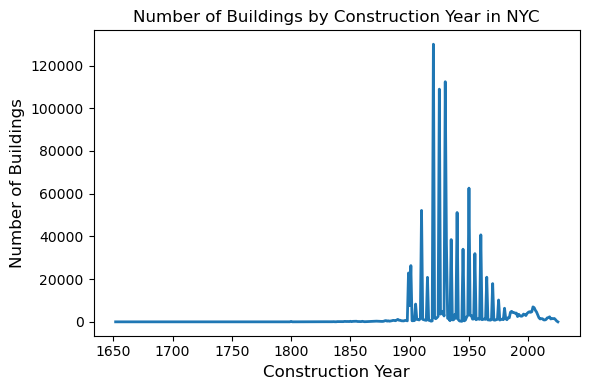

In [65]:
fig, ax = plt.subplots(figsize=(6, 4))

# plotting line chart of number of buildings by 'CNSTRCT_YR'
ax.plot(year_df['count'], linewidth=2)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)
plt.title('Number of Buildings by Construction Year in NYC', fontsize=12)

plt.tight_layout()

In [66]:
# calculating the cumulative sum of buildings by 'CNSTRCT_YR'
year_df['cumsum'] = year_df['count'].cumsum()

# previewing first five rows
year_df.head()

,count,cumsum
CNSTRCT_YR,,
1652,1,1
1661,2,3
1680,1,4
1690,1,5
1694,1,6


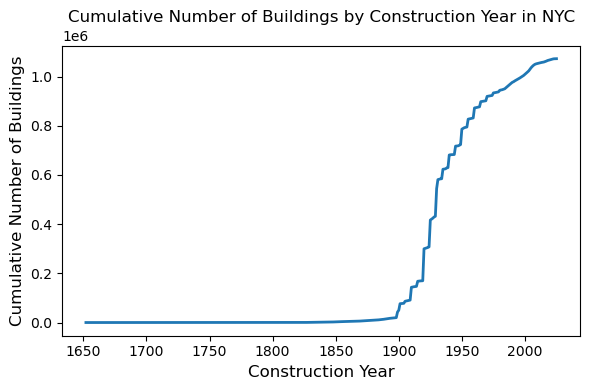

In [67]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(year_df['cumsum'], linewidth=2)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Cumulative Number of Buildings', fontsize=12)
plt.title('Cumulative Number of Buildings by Construction Year in NYC', fontsize=12)

plt.tight_layout()

## 5.2 Identify Oldest Building in Dataset

Sorting by the 'CNSTRCT_YR' in ascending order and dropping records that don't have a building name (i.e. NAME).

In [68]:
(building_df
 .sort_values(by='CNSTRCT_YR')
 .dropna(subset=['NAME'])
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
955187,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.54,2100,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}
710089,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,4113403,1661.0,08/22/2017 12:00:00 AM,Constructed,776399,26.12,2100,64.0,0,0,4050130006,4050130006,Photogramm,{71A760A6-6D2F-48F8-8C93-C8B66071B868}
52813,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,5087656,1680.0,04/13/2020 12:00:00 AM,Constructed,702698,38.64,2100,38.0,0,0,5078570090,5078570090,Photogramm,{CB13BCBA-9DF3-4455-9206-824FE91F2EDE}
521346,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,5042188,1690.0,04/13/2020 12:00:00 AM,Alteration,806241,22.26,2100,21.0,0,0,5028300049,5028300049,Photogramm,{93B1CB7B-BE72-40DB-9B66-01E92DF4AE6E}
503563,MULTIPOLYGON (((-74.01121069434295 40.70334382...,Fraunces Tavern,1078965,1719.0,01/28/2020 12:00:00 AM,Constructed,299639,47.83,2100,7.0,0,0,1000070035,1000070035,Photogramm,{4B8DF813-9EAD-402A-81D9-58ECCB4ED502}


In [69]:
# identifying the oldest building with a building name in this dataset and
oldest = (
    building_df
    .sort_values(by='CNSTRCT_YR')
    .dropna(subset=['NAME'])
    .head(1)
)

oldest

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
955187,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.54,2100,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}


### We will use the Pieter Claesen Wyckoff House as the oldest building in this dataset.

Screenshot of Pieter Claesen Wyckoff House from Wikipedia:

https://en.wikipedia.org/wiki/Wyckoff_House

![Pieter-Claesen-Wyckoff-House](images/Pieter-Claesen-Wyckoff-House.png)

# 6. Conclusion

In this notebook, we reviewed various ways to inspect, clean, wrangle, and detect outliers in your data.  Specifically, we focused on ways to inspect the shape (number of rows, columns) of your data, fill in or replace null values with the median, and detect outliers with box plots. This step is crucial if you are interested in modeling or predicting values. In Part 3, we will focus on data visualization.